# __Part 3  - Neural Network__

####__Deep neural network__ = a __layered representation of data__. 
  - The term __"deep"__ refers to the presence of __multiple layers__.

  -  Neural Network (NN) __represents the layered data__ in different ways and dimensions __by applying specific operations to transform our data at each layer__. 

  -  __By performing these transformations, the model can better understand our data and therefore provide a better prediction__.



####__Keras__

- __Keras = a high-level neural networks API__ which is __to focus on enabling fast experimentation__. 

- Use Keras if you need a deep learning library that:

  - Supports both convolutional networks (CNN) & recurrent networks (RNN)

---
\\

###__Basis of Neural Networks__ :

__Neural Networks__ are composed of
- __Inputs__
- __Outputs__
- __Hidden Layers__
  - __Layers are connected by weights $w_{ij}$__.
  - __There are Biases $b$ on each layer__.
  - __Biases are controlled neurons__ placed in each layer before the output __that allow to move the network in the needed direction__.

\\


__Loss/Cost Function__
-  __Cost Function is responsible for determining how well the network did__ 

- __The lower cost function, the less error in the network__. 
Cost functions include:

  - Mean Squared Error
  - Mean Absolute Error
  - Hinge Loss

- We pass it to the output and the expected output, and it returns to us some value representing the cost/loss of the network. 

- __To optimize the cost function, try to make it as low__ as possible.

  - Ex: __Gradient Descent -> Minimize the loss function__ 



\\
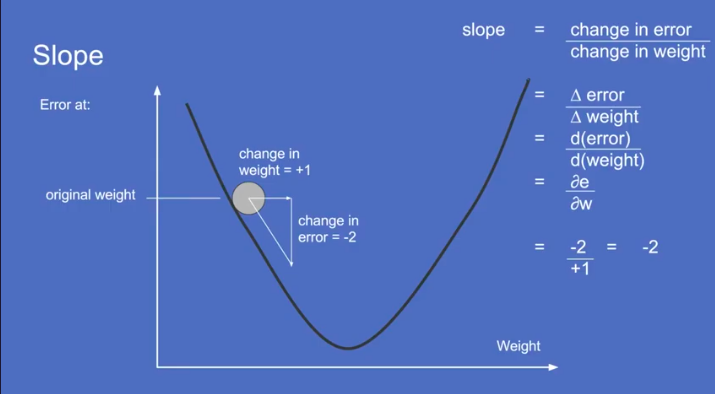

\\



###__Calculating the Network__:

1. __Take the weighted sum of each Neuron in the layer__ by adding together all of the weights that connect the Neurons __from the previous layer to the Neuron we need to find the value for__ 

  > $X_{j} =F(\sum_{i=0}^n w_{ij} x_i + b)$

2. __Add the Bias $b$__ (const.)

3. __Apply Activation Functions $F$ to Biases to move them according to the function__ and help place neurons in the hidden layers between two values __to determine the output__

  - __Activation Function will decide whether the neuron's input to the network is important or not in the process of prediction__.
  - __Activation Function moves the network up in complexity & dimension__

4. __Repeat the process until the last output layer__

![fig](https://1394217531-files.gitbook.io/~/files/v0/b/gitbook-legacy-files/o/assets%2F-LvBP1svpACTB1R1x_U4%2F-LvI8vNq_N7u3RWVAPLk%2F-LvJSdcFXzoI-WW0L3w5%2Fimage.png?alt=media&token=84526dc6-4634-4de5-aacf-00a179afac76)



\\



For another example, here is also shown how deep neural networks work for four-pixel photo as input to see what type of pixel pattern in the output is in the photo.

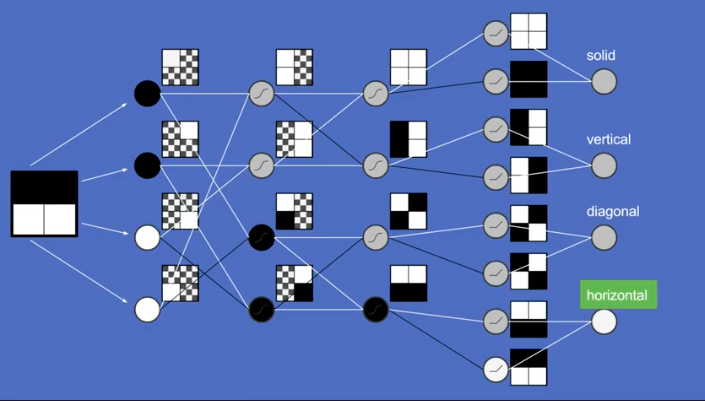

### __Training the Network__:

1. __Make predictions__

2. __Compare predictions to the expected values calculated in the Loss functions__
  - The lower the loss function, the better the network

3. __Calculate the Gradient__ 


4. __Use the back-propagation__ algorithm __to__ back track through the neural network and __adjust weights and biases according to the calculated gradient__.



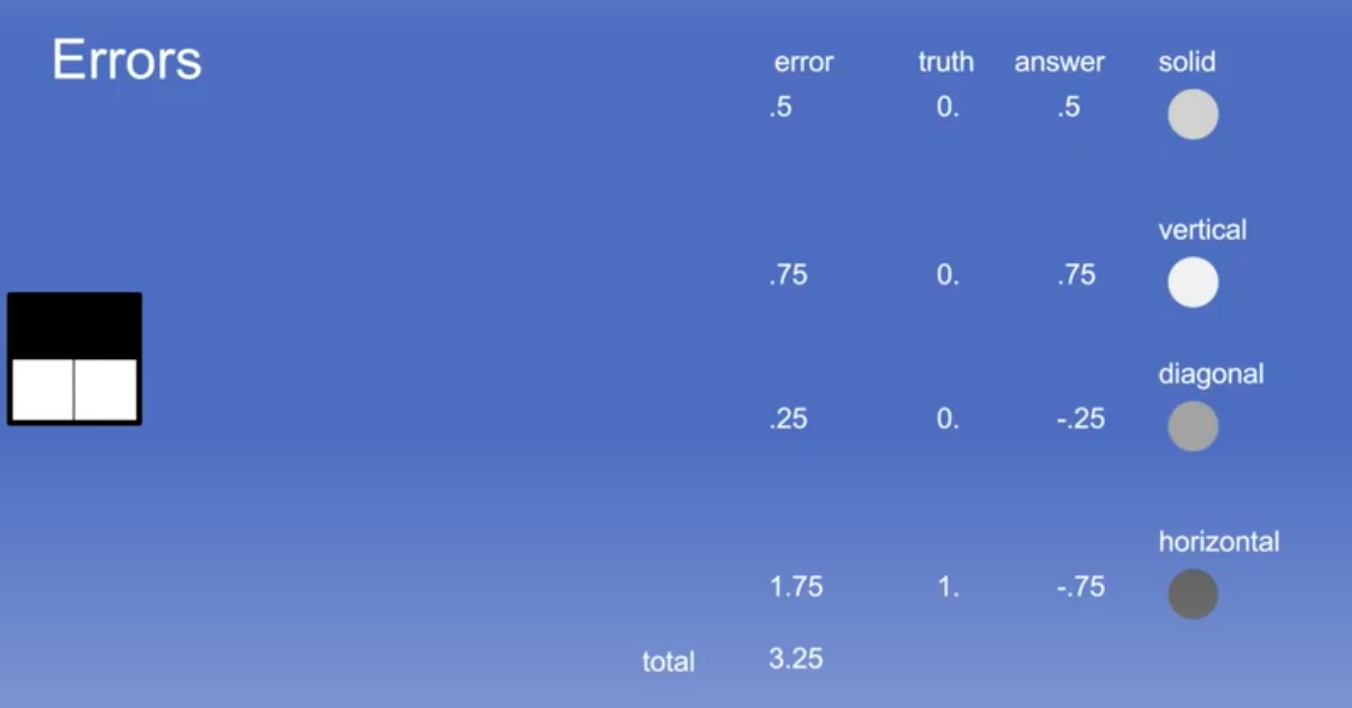




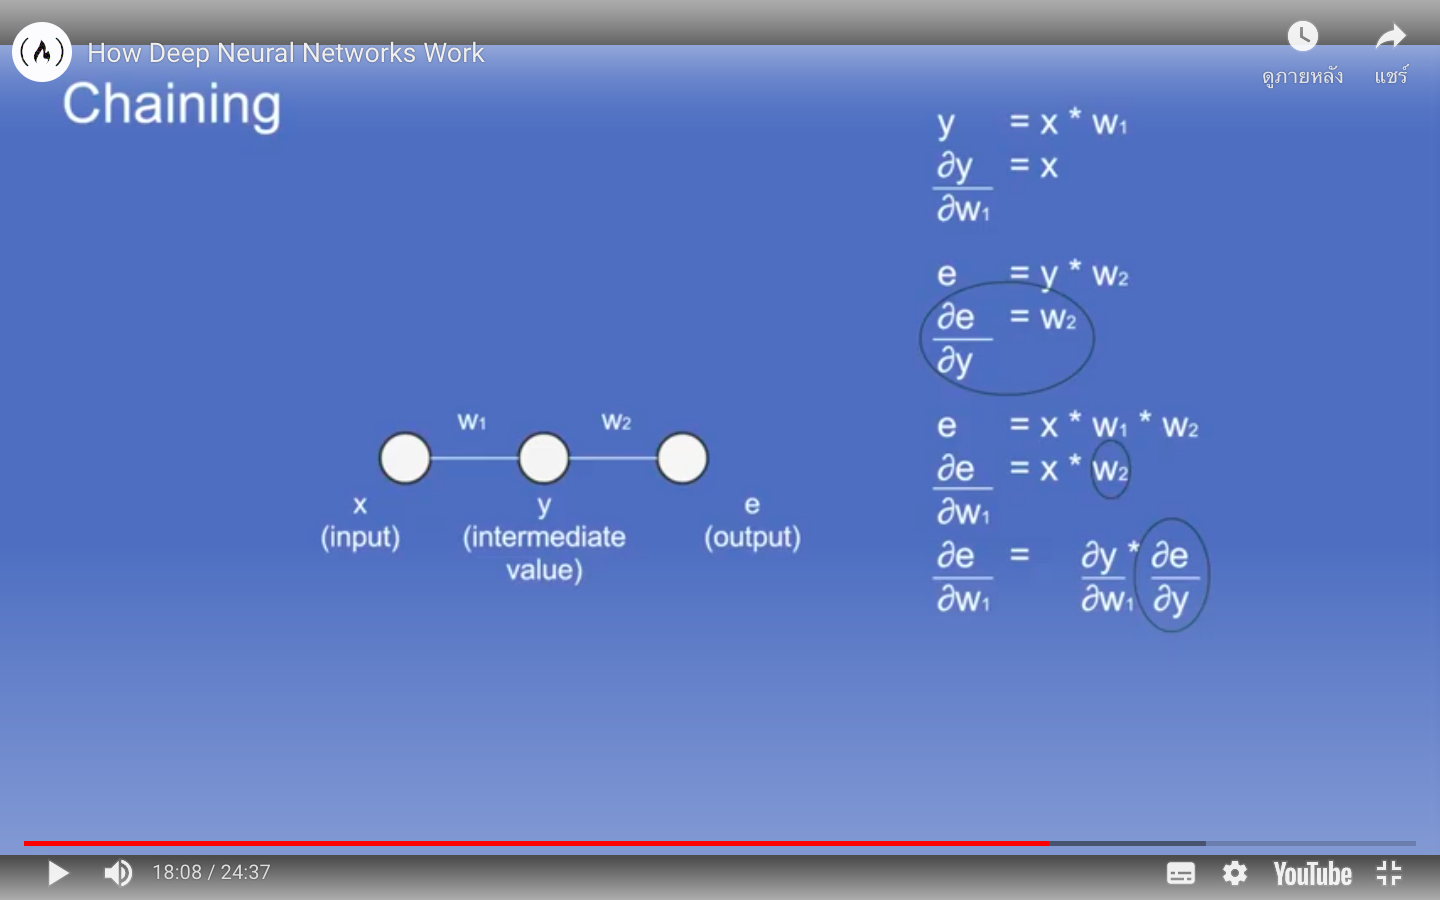

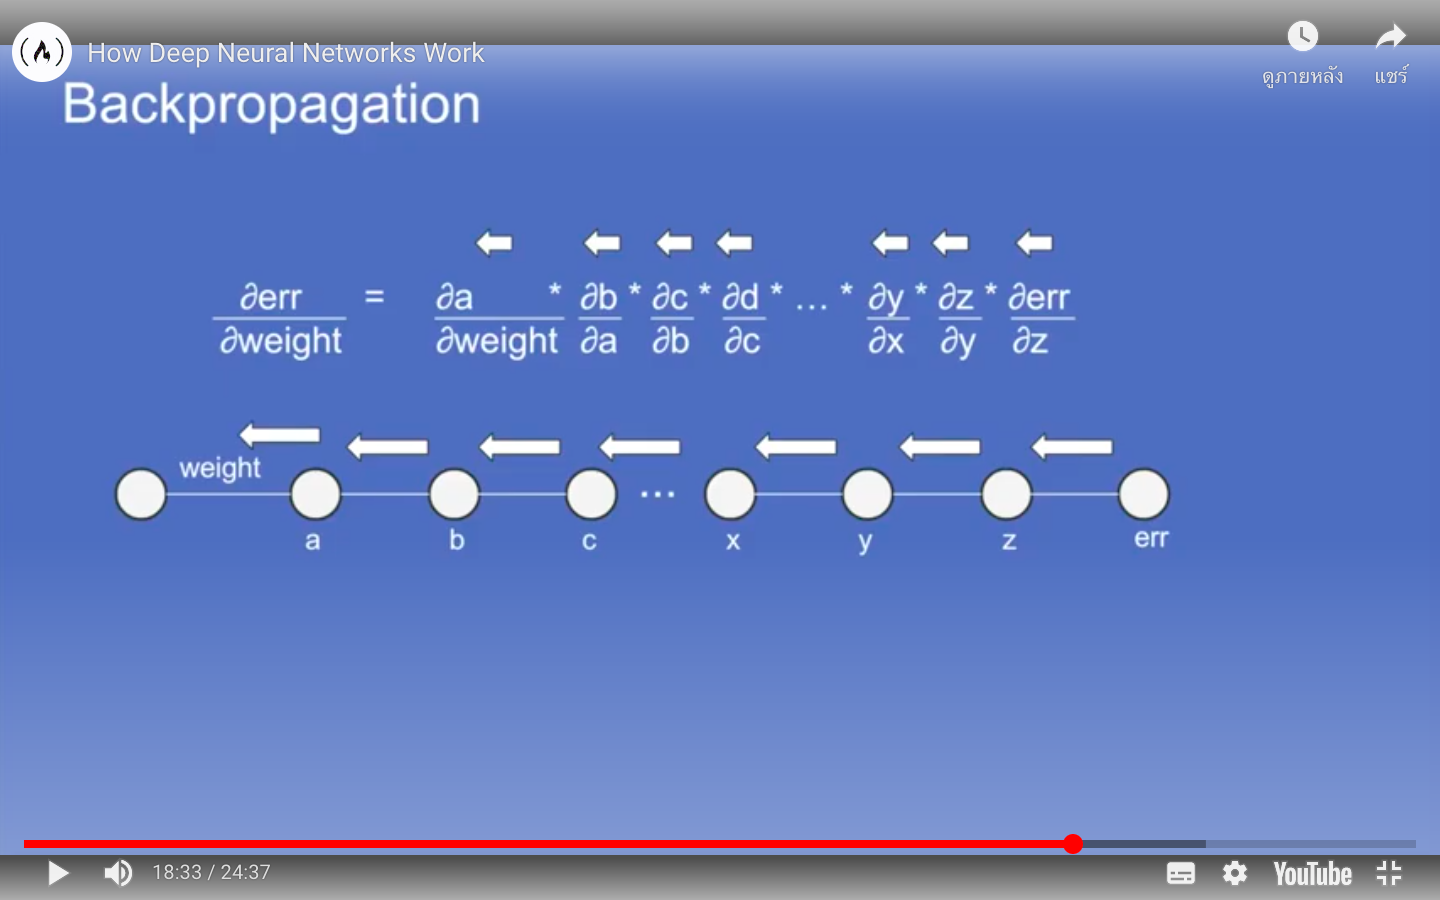

####__Optimizer__

__Optimizer (optimization function)__ - A function that implements the backpropagation algorithm, __which changes the weights and biases of our network by changing the gradient__.


A list of a few common optimizers:

- Gradient Descent
- Stochastic Gradient Descent
- Mini-Batch Gradient Descent
- Momentum
- Nesterov Accelerated Gradient


\\

---

\\



## __Creating a Neural Network__

In [ ]:
import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt

Here, we imported a MNIST Fashion  dataset from Keras which included 60,000 images for training and 10,000 images for validation/testing.


In [ ]:
fashion_mnist = keras.datasets.fashion_mnist  # load dataset

(train_images, train_labels), 
(test_images, test_labels) = fashion_mnist.load_data()  # split into testing and training sets

4431872/4422102 [==============================] - 0s 0us/step


In [ ]:
#Sets are train_images, train_labels, test_images, and test_labels
train_images.shape

(60000, 28, 28)

This shape means (60000 images, 28 pixels, 28 pixels)

So we've got 60,000 images that are made up of 28x28 pixels (784 pixels in total)

In [ ]:
type(train_images),\
train_images[0,23,23]  # let's have a look at one pixel

(numpy.ndarray, 194)

From the train_images set we are calling: [image number 0, row 23(pixel), column 23(pixel)]

Our pixel values are between 0 and 255, 0 being black and 255 being white. This means we have a grayscale image as there are no color channels.

In [ ]:
train_labels[:10]  # let's have a look at the first 10 training labels


array([9, 0, 0, 3, 0, 2, 7, 2, 5, 5], dtype=uint8)

Our labels are integers ranging from 0 - 9. Each integer represents a specific article of clothing. We'll create an array of label names to indicate which is which.

In [ ]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

Seeing what the images look like

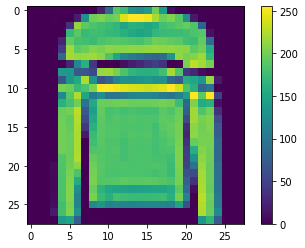

In [ ]:
#This block of code will use madplotlib to help you see a grid view of the pixelated image. 
plt.figure()
plt.imshow(train_images[5])
plt.colorbar()
plt.grid(False)
plt.show()

##__Data Preprocessing__

The last step before creating our model is to **preprocess our data**. 

- This simply means applying some __prior transformations to our data before feeding it the model__. 

- In this case we will simply scale all our greyscale pixel values (0-255) to be between 0 and 1. 
We can do this by dividing each value in the training and testing sets by 255.0. 

- We do this because smaller values will make it easier for the model to process our values. 



In [ ]:
train_images = train_images / 255.0

test_images = test_images / 255.0
#I will have to practice this step to full understand and get some good practice with it. 

##__Building the Model__

Now it's time to build the model! We are going to use a keras __sequential model__ with three different layers. This model represents a __feed-forward neural network__ (one that passes values from left to right). We'll break down each layer and its architecture below.

In [ ]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),  # input layer (1)
    keras.layers.Dense(128, activation='relu'),  # hidden layer (2)
    keras.layers.Dense(10, activation='softmax') # output layer (3)
])

__Sequential Neural Networks:__ Calculate from the left side to the right side of the neural network (in order)


**Layer 1:** This is our input layer and it will consist of 784 neurons. We use the flatten layer with an input shape of (28,28) to denote that our input should come in in that shape. 
__The flatten means that our layer will reshape the shape__ (28,28) __array into a vector of__ 784 __neurons so that each pixel will be associated with one neuron__.

**Layer 2:** This is our first and only hidden layer.
__The *dense* denotes that this layer will be fully connected__ and each neuron from the previous layer connects to each neuron of this layer. It has 128 neurons and uses the rectify linear unit activation function.

**Layer 3:** This is our output later and is also a dense layer. 
__The number of output neurons (10) should be the same as the number of classes (10).__
It has 10 neurons that we will look at to determine our models output. Each neuron represnts the probabillity of a given image being one of the 10 different classes. __The activation function *softmax* is used on this layer to calculate a probabillity distribution for each class__. 
This means the value of any neuron in this layer will be between 0 and 1, __where 1 represents a high probabillity of the image being that class.__

\\

##__Compile the Model__

The last step in building the model is to define the following

- Optimizer
- Loss function
- Metrics we would like to track

\\

__Hyperparameter: a parameter whose value is set before the learning process begins.__ Another way to put it is that they are settings that can be tuned to control the behavior of a machine learning algorithm __(e.g. epochs)__.

__Hyperparameter Tuning/Optimizations__: Choosing a set of hyperparameters for a learning algorithm

In [ ]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

\\

##__Training the Model__

Now it's finally time to train the model. Since we've already done all the work on our data this step is as easy as calling a single method.

In [ ]:
model.fit(train_images, train_labels, epochs=5)  # we pass the data, labels and epochs and watch the magic!

Epoch 1/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2292 - accuracy: 0.9139
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2217 - accuracy: 0.9158
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2169 - accuracy: 0.9191
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2101 - accuracy: 0.9218
Epoch 5/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2023 - accuracy: 0.9236


 \\

##__Evaluating the Model__

Now it's time to test/evaluate the model. We can do this quite easily using another builtin method from keras.

The *verbose* argument is defined from the keras documentation as:
"verbose: 0 or 1. Verbosity mode. 0 = silent, 1 = progress bar."
(https://keras.io/models/sequential/)

In [ ]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=1) 

print('Test accuracy:', test_acc)

313/313 [==============================] - 1s 2ms/step - loss: 0.3433 - accuracy: 0.8855
Test accuracy: 0.8855000138282776


__Overfitting__ is __when the accuracy here is lower than when training the model__.

The model is now trained and we can use it to predict values.

\\

## __Making Predictions__

To make predictions we simply need to pass an array of data in the form we've specified in the input layer to ```.predict()``` method.

In [ ]:
predictions = model.predict(test_images)
print(predictions[0])

[1.17833956e-07 6.88298132e-06 9.54066959e-09 3.52699397e-10
 1.58687403e-11 2.85809219e-04 2.22691909e-09 3.68304085e-03
 1.50500572e-08 9.96024132e-01]


This method returns to us __an array of predictions (probability distribution) for each image.__ 

Each number represents a class from class_names, __the larger number represents the class the model is predicting the array is an image of__.

In [ ]:
predictions[0]

array([1.17833956e-07, 6.88298132e-06, 9.54066959e-09, 3.52699397e-10,
       1.58687403e-11, 2.85809219e-04, 2.22691909e-09, 3.68304085e-03,
       1.50500572e-08, 9.96024132e-01], dtype=float32)

If we want to get the value with the highest score we can use a useful function from numpy called ```argmax()```. 
This simply returns the index of the maximium value from a numpy array. 

In [ ]:
np.argmax(predictions[0]) #The number in the 9th postion(really 10th) of the array is the maximum value

9

In [ ]:
print(class_names[np.argmax(predictions[0])]) #The label in the 9th position is the label the model is predicting is correct

Ankle boot


We can check if this is correct by looking at the value of the cooresponding test label.

In [ ]:
test_labels[0]

9

Putting it all together here because I like how it was done in the video.

The model has guessed: Pullover


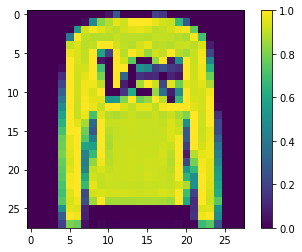

In [ ]:
print('The model has guessed: {}'
.format(class_names[np.argmax(predictions[1])])) #Enter prediction index
plt.figure()
plt.imshow(test_images[1]) #enter image index
plt.colorbar()
plt.grid(False)
plt.show()
#The model should return what it's prediction of the pixelated image is. 
#The matplotlib portion of the code block will return a graph of the image in question

\\

##__Verifying Predictions__

The model will have us pick a number, it will then tell us the expected image along with the grid and then tell us what the guess is....pretty much the same as above thing with an input option. Pretty cool!

Pick a number: 34


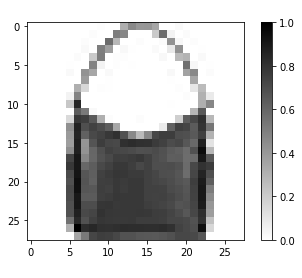

In [ ]:
COLOR = 'white'
plt.rcParams['text.color'] = COLOR
plt.rcParams['axes.labelcolor'] = COLOR

def predict(model, image, correct_label):
  class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
  prediction = model.predict(np.array([image]))
  predicted_class = class_names[np.argmax(prediction)]

  show_image(image, class_names[correct_label], predicted_class)


def show_image(img, label, guess):
  plt.figure()
  plt.imshow(img, cmap=plt.cm.binary)
  plt.title("Excpected: " + label)
  plt.xlabel("Guess: " + guess)
  plt.colorbar()
  plt.grid(False)
  plt.show()


def get_number():
  while True:
    num = input("Pick a number: ")
    if num.isdigit():
      num = int(num)
      if 0 <= num <= 1000:
        return int(num)
    else:
      print("Try again...")

num = get_number()
image = test_images[num]
label = test_labels[num]
predict(model, image, label)